In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')

In [27]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

clf = LogisticRegressionCV(n_jobs=-1, cv=10)
clf.fit(data.drop('Class', 1), data[['Class']])

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [4]:
clf.scores_

{1: array([[ 0.99322379,  0.98862439,  0.98876483,  0.98974791,  0.98974791,
          0.98974791,  0.98974791,  0.98974791,  0.98974791,  0.98974791],
        [ 0.99933291,  0.99933291,  0.99961379,  0.99961379,  0.99961379,
          0.99961379,  0.99961379,  0.99961379,  0.9989467 ,  0.99908714],
        [ 0.99919244,  0.999684  ,  0.999684  ,  0.999684  ,  0.999684  ,
          0.999684  ,  0.999684  ,  0.999684  ,  0.999684  ,  0.999684  ],
        [ 0.99842   ,  0.99842   ,  0.99894667,  0.99877111,  0.99877111,
          0.99877111,  0.99877111,  0.99877111,  0.99877111,  0.99877111],
        [ 0.99852533,  0.99856044,  0.99880622,  0.99880622,  0.99880622,
          0.99880622,  0.99880622,  0.99880622,  0.99880622,  0.99880622],
        [ 0.99870084,  0.99908708,  0.99912219,  0.99912219,  0.99912219,
          0.99912219,  0.99912219,  0.99912219,  0.99912219,  0.99912219],
        [ 0.99950843,  0.99964888,  0.99968399,  0.99968399,  0.99968399,
          0.99968399,  0.9996

In [30]:
import seaborn as sns

corr = data.corr()

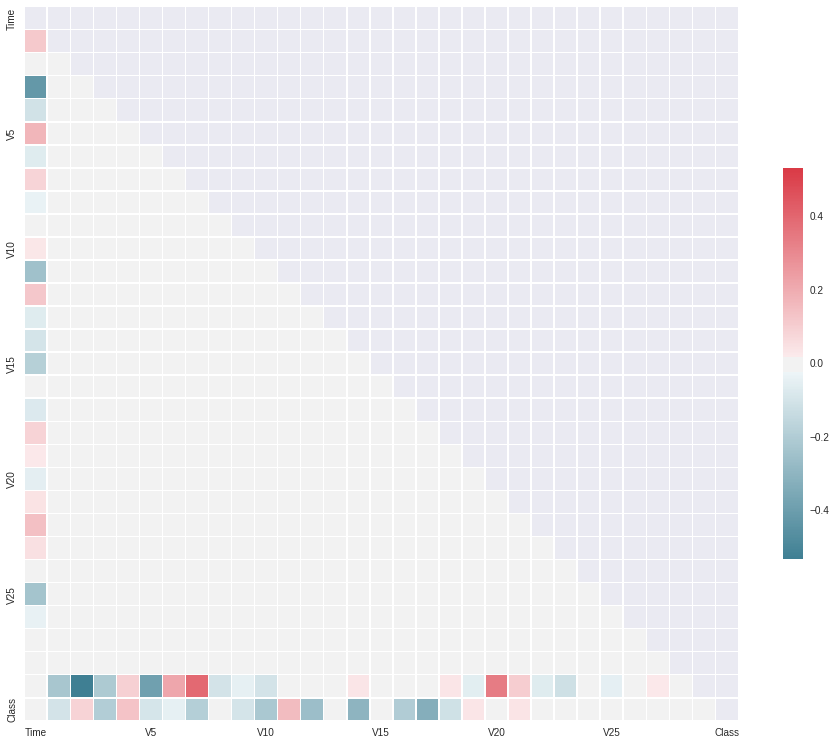

In [31]:
from string import letters
import matplotlib.pyplot as plt
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
pca.explained_variance_ratio_

array([  9.99972249e-01,   2.77382192e-05,   1.64252884e-09,
         1.06660874e-09,   8.88874469e-10,   8.33233570e-10,
         7.98203630e-10,   7.10051363e-10,   6.34265399e-10,
         5.37294757e-10,   5.29801807e-10,   4.49190135e-10,
         4.39949304e-10,   4.23389951e-10,   4.00283090e-10,
         3.70871550e-10,   3.44270582e-10,   3.40095378e-10,
         3.17288590e-10,   2.98782995e-10,   2.92381939e-10,
         2.41075656e-10,   2.22659847e-10,   1.78412754e-10,
         1.62599692e-10,   1.08605881e-10,   1.02002807e-10,
         7.34505466e-11,   5.02287301e-11,   4.70092617e-11,
         3.65465391e-13])

In [35]:
X_r = pca.transform(data)

In [41]:
#The first column of the data after dimension reduction has 99% of the total variance
x = X_r[:, 0]

In [47]:
clf1 = LogisticRegressionCV(n_jobs=-1, cv=5)
clf1.fit(x.reshape(x.shape[0],1), data[['Class']])

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [48]:
clf1.scores_

{1: array([[ 0.998262  ,  0.998262  ,  0.998262  ,  0.998262  ,  0.998262  ,
          0.998262  ,  0.998262  ,  0.998262  ,  0.998262  ,  0.998262  ],
        [ 0.001738  ,  0.998262  ,  0.998262  ,  0.998262  ,  0.998262  ,
          0.998262  ,  0.998262  ,  0.998262  ,  0.998262  ,  0.998262  ],
        [ 0.99827952,  0.99827952,  0.99827952,  0.99827952,  0.99827952,
          0.99827952,  0.99827952,  0.99827952,  0.99827952,  0.99827952],
        [ 0.99827952,  0.99827952,  0.99827952,  0.99827952,  0.99827952,
          0.99827952,  0.99827952,  0.99827952,  0.99827952,  0.99827952],
        [ 0.99827952,  0.99827952,  0.99827952,  0.99827952,  0.99827952,
          0.99827952,  0.99827952,  0.99827952,  0.99827952,  0.99827952]])}